Todo

pass/get X_test


In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [2]:
model_to_load = "simple_try_on_unaugmented_33_classes"
#model_to_load = "first_model_on_augmented"
#model_to_load = "emergency_model"
def load_our_model(model_to_load):
    #load a model
    models_folder  = os.path.join("..","..","models")

    model_path = os.path.join(models_folder, model_to_load)

    model = keras.models.load_model(model_path)
    
    return model
model = load_our_model(model_to_load)
model.summary()

In [3]:
batch_size = 16 #None = 1 #16 #32
img_height = 224
img_width = 224
seed_train_validation = 69 # Must be same for train
path_to_dataset_test = os.path.join("..","..","data","food","test")
path_to_dataset_test = os.path.join("..","..","test_data","2_whole_data_some_dups","test")
X_test = image_dataset_from_directory(
        path_to_dataset_test,
        label_mode="int",
        color_mode="rgb",
        seed=seed_train_validation,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=False
        )



Found 3914 files belonging to 33 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Con

In [4]:
#model.predict(X_test)

## Functions

In [5]:
def plot_learning_curve(history):
    history.history;
    train_accuracy = history.history["sparse_categorical_accuracy"]
    val_accuracy = history.history["val_sparse_categorical_accuracy"]

    plt.plot(train_accuracy, label="train")
    plt.plot(val_accuracy,label="val")
    plt.legend()
    return None

In [6]:
#get y
def get_y_from_X(X, batched=True):
    
    y_batched = []
    y = []
    
    for batch_image, batch_label in X:
        
        if batched:
            y_batched.append(batch_label.numpy())
        else:
            for image,label in zip(batch_image, batch_label):
                y.append(label.numpy())
     
    if batched:
        print("len y_batched", len(y_batched) )
        return y_batched
    else:
        print("len y", len(y))
        return y
def get_y_test(X_test_in):
    y_test = get_y_from_X(X_test_in, batched=False)
    return y_test
    
def get_y_pred(X_test_in):
    
    y_pred_0 = model.predict(X_test, verbose=1)
    y_pred = []
    
    for pred in y_pred_0:
        y_pred.append(pred.argmax())
        
    return y_pred

y_pred = get_y_pred(X_test)
y_test = get_y_test(X_test)
y_pred;

245/245 [==============================] - 6s 13ms/step
len y 3914


In [7]:
def get_target_dict():
    #classes = os.listdir(path_to_dataset_test)
    classes = X_test.class_names
    classes.sort()
    
    #classes.remove(".ipynb_checkpoints")
    
    target_dict_out = {}
    for index, veg in enumerate(classes):
        target_dict_out[index] = veg
    
    return target_dict_out
target_dict = get_target_dict()
target_dict

{0: 'apple',
 1: 'asparagus',
 2: 'avocado',
 3: 'banana',
 4: 'beetroot',
 5: 'blueberry',
 6: 'broccoli',
 7: 'cabbage',
 8: 'carrot',
 9: 'cauliflower',
 10: 'celery',
 11: 'chicken',
 12: 'corn',
 13: 'cranberry',
 14: 'cucumber',
 15: 'eggplant',
 16: 'garlic',
 17: 'ginger',
 18: 'grape',
 19: 'kiwi',
 20: 'leek',
 21: 'lemon',
 22: 'lettuce',
 23: 'lime',
 24: 'mushroom',
 25: 'onion',
 26: 'orange',
 27: 'pineapple',
 28: 'potato',
 29: 'pumpkin',
 30: 'spinach',
 31: 'tomato',
 32: 'zucchini'}

test label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
first test label: 0
first test label human: apple


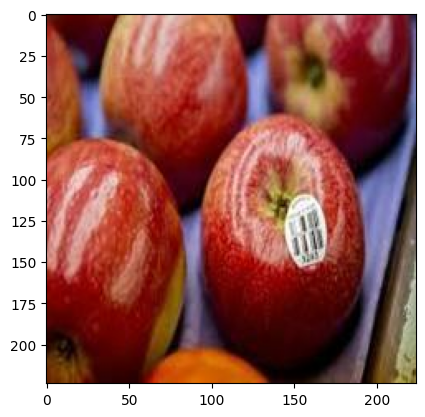

In [8]:
#show one image
count = 0
test_image, test_label = None, None

for image, label in X_test:#.take(1):
    if count == 0 :
        test_image = image.numpy()
        test_label = label.numpy()
    count+=1
    if count > 0: break
    
#if you want to see an image
print("test label:", test_label)
print("first test label:", test_label[0])
print("first test label human:", target_dict[test_label[0]])
plt.imshow(test_image[0]/255)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_dict.values()))

              precision    recall  f1-score   support

       apple       0.39      0.41      0.40       181
   asparagus       0.82      0.57      0.67       225
     avocado       0.50      0.32      0.39       176
      banana       0.47      0.40      0.43       175
    beetroot       0.00      0.00      0.00        10
   blueberry       0.60      0.72      0.65       151
    broccoli       0.92      0.83      0.87       200
     cabbage       0.49      0.90      0.63       200
      carrot       0.96      0.97      0.97       200
 cauliflower       0.91      0.45      0.60       200
      celery       0.00      0.00      0.00         7
     chicken       0.67      0.08      0.14        26
        corn       0.00      0.00      0.00        10
   cranberry       0.75      0.79      0.77       156
    cucumber       0.63      0.92      0.75       200
    eggplant       0.82      0.78      0.80       153
      garlic       0.67      0.20      0.31        10
      ginger       0.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
import pandas as pd
df = pd.DataFrame({"y_pred" : y_pred ,"y_test" : y_test})
df;

In [11]:
from sklearn.metrics import classification_report
classes_list = X_test.class_names
print(classification_report(y_test, y_pred, target_names=classes_list))

              precision    recall  f1-score   support

       apple       0.39      0.41      0.40       181
   asparagus       0.82      0.57      0.67       225
     avocado       0.50      0.32      0.39       176
      banana       0.47      0.40      0.43       175
    beetroot       0.00      0.00      0.00        10
   blueberry       0.60      0.72      0.65       151
    broccoli       0.92      0.83      0.87       200
     cabbage       0.49      0.90      0.63       200
      carrot       0.96      0.97      0.97       200
 cauliflower       0.91      0.45      0.60       200
      celery       0.00      0.00      0.00         7
     chicken       0.67      0.08      0.14        26
        corn       0.00      0.00      0.00        10
   cranberry       0.75      0.79      0.77       156
    cucumber       0.63      0.92      0.75       200
    eggplant       0.82      0.78      0.80       153
      garlic       0.67      0.20      0.31        10
      ginger       0.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred, labels=classes_list , normalize='true') #true as in truth
s = sns.heatmap(cm,xticklabels=classes_list, yticklabels=classes_list)
s.set(ylabel="Actual", xlabel="Prediction");

ValueError: At least one label specified must be in y_true